**Plan**

**1. Introduction**<br>
**2. Training and testing datasets**<br>
**3. Cross-validation**<br>
**4. Performance metrics**<br>
**5. Overfitting and underfitting**


# **Introduction**

Evaluation and validation are critical components of the machine learning lifecycle, ensuring that models perform effectively and reliably. Evaluation involves assessing a model's performance using specific metrics such as accuracy, precision, recall, and F1 score, which provide insights into its ability to make accurate predictions. Validation, on the other hand, involves testing the model on unseen data to confirm its generalizability and robustness. Techniques such as cross-validation, holdout validation, and bootstrapping are employed to mitigate overfitting and ensure that the model maintains high performance across different datasets. Together, these processes are essential for developing trustworthy and high-quality machine learning models that can be confidently deployed in real-world applications.

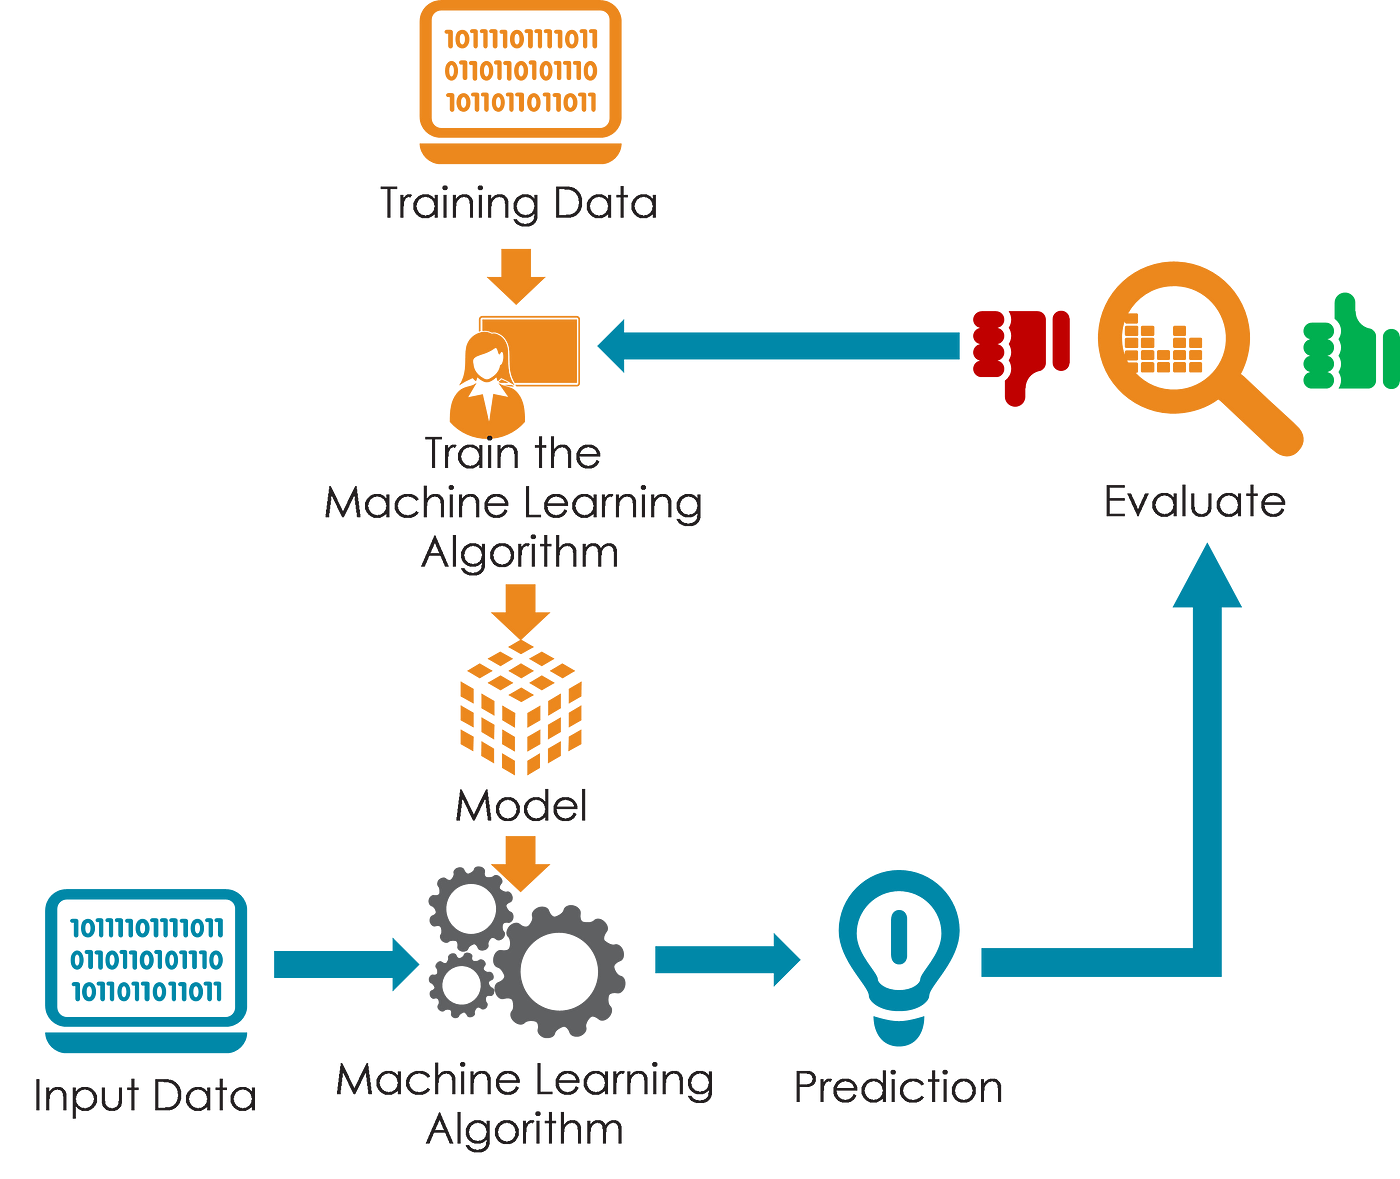

# **Training and Testing Datasets**

In machine learning, the use of training and testing datasets can be formalized mathematically to ensure the model's performance is evaluated rigorously.

1. **Training Dataset ($ D_{train} $)**:
   - Suppose we have a dataset $ D = \{ (x_1, y_1), (x_2, y_2), \ldots, (x_n, y_n) \} $, where $ x_i $ represents the input features and $ y_i $ represents the corresponding target values.
   - The training dataset $ D_{train} $ is a subset of $ D $, used to train the model $ f $.
   - The model $ f $ is trained by optimizing a loss function $ L $ over $ D_{train} $. For example, in supervised learning:$$\hat{f} = \arg\min_f \sum_{(x_i, y_i) \in D_{train}} L(f(x_i), y_i)$$

2. **Testing Dataset ($ D_{test} $)**:
   - The testing dataset $ D_{test} $ is another subset of $ D $, disjoint from $ D_{train} $, used to evaluate the model's performance.
   - To assess the generalization of the model $ \hat{f} $, we calculate performance metrics on $ D_{test} $. For example, if $ M $ is the metric function (such as accuracy, mean squared error), we compute:$$M_{test} = \frac{1}{|D_{test}|} \sum_{(x_j, y_j) \in D_{test}} M(\hat{f}(x_j), y_j)$$

3. **Data Splitting**:
   - Data is often split into $ D_{train} $ and $ D_{test} $ using a ratio, such as 80-20 or 70-30. If $ n $ is the total number of samples in $ D $, then:$$|D_{train}| = \lfloor p \times n \rfloor \quad \text{and} \quad |D_{test}| = n - |D_{train}| $$
     where $ p $ is the proportion of data used for training (e.g., 0.8 for 80%).


By formally defining and using these mathematical constructs, machine learning practitioners can ensure their models are trained and evaluated in a structured and effective manner, leading to more reliable and generalizable predictive performance.

In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model using the training data
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=iris.target_names)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)


# **Cross-validation**

**Definition**

Cross-validation is a technique used to assess the generalizability of a machine learning model by splitting the data into multiple train-test splits.

**<h2>1. k-Fold Cross-Validation</h2>**

**Theory:**
- Split the data into $ k $ equal-sized folds.
- For each fold $ i $ (from 1 to $ k $):
  - Use the $ i $-th fold as the test set.
  - Use the remaining $ k-1 $ folds as the training set.
- Compute the performance metric for each fold.
- Average the performance metrics to obtain the final evaluation.

Mathematically, the k-fold cross-validation error is given by:
$$
CV_{(k)} = \frac{1}{k} \sum_{i=1}^{k} M_{test}^{(i)}
$$
where $ M_{test}^{(i)} $ is the performance metric on the $ i $-th test fold.



In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Initialize the k-Fold cross-validation with 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=kf)

print(f"k-Fold Cross-Validation Scores: {scores}")
print(f"Mean Score: {scores.mean():.2f}")

**<h2>2. Stratified k-Fold Cross-Validation</h2>**
**Theory:**
- Similar to k-Fold cross-validation but ensures each fold has a proportional representation of each class.
- Particularly useful for imbalanced datasets.

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Initialize the Stratified k-Fold cross-validation with 5 folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
stratified_scores = cross_val_score(model, X, y, cv=skf)

print(f"Stratified k-Fold Cross-Validation Scores: {stratified_scores}")
print(f"Mean Score: {stratified_scores.mean():.2f}")

**<h2>3. Leave-One-Out Cross-Validation (LOOCV)</h2>**

**Theory:**
- A special case of k-Fold where $ k $ equals the number of data points.
- Each sample is used once as the test set while the remaining samples form the training set.

Mathematically, the LOOCV error is given by:
$$
CV_{(n)} = \frac{1}{n} \sum_{i=1}^{n} M_{test}^{(i)}
$$
where $ n $ is the number of samples.



In [ ]:
from sklearn.model_selection import LeaveOneOut, cross_val_score

# Initialize Leave-One-Out cross-validation
loo = LeaveOneOut()

# Perform cross-validation
loo_scores = cross_val_score(model, X, y, cv=loo)

print(f"Leave-One-Out Cross-Validation Scores: {loo_scores}")
print(f"Mean Score: {loo_scores.mean():.2f}")


**<h2>4. Repeated k-Fold Cross-Validation</h2>**

**Theory:***

* Repeats the k-Fold cross-validation process multiple times with different random splits.
* Provides a more robust estimate by averaging the results of multiple rounds.

In [ ]:
from sklearn.model_selection import RepeatedKFold, cross_val_score

# Initialize Repeated k-Fold cross-validation with 5 folds and 10 repeats
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)

# Perform cross-validation
repeated_kf_scores = cross_val_score(model, X, y, cv=rkf)

print(f"Repeated k-Fold Cross-Validation Scores: {repeated_kf_scores}")
print(f"Mean Score: {repeated_kf_scores.mean():.2f}")

**<h2>5. Time Series Split</h2>**

**Theory:**

* Used for time series data where the order of data points is important.
* Split the data into training and test sets based on time, ensuring that the test set is always after the training set.

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

# Initialize Time Series Split with 5 splits
tscv = TimeSeriesSplit(n_splits=5)

# Perform cross-validation
time_series_scores = cross_val_score(model, X, y, cv=tscv)

print(f"Time Series Split Cross-Validation Scores: {time_series_scores}")
print(f"Mean Score: {time_series_scores.mean():.2f}")


# **Performance metrics**

Performance metrics in machine learning are quantitative measures used to evaluate the effectiveness and accuracy of a predictive model. These metrics provide insights into various aspects of model performance, such as accuracy, precision, recall, F1 score, area under the ROC curve (AUC), mean average precision (mAP), normalized mutual information (NMI), and adjusted rand index (ARI). Each metric offers a unique perspective: accuracy reflects overall correctness, precision and recall measure the quality of positive predictions, the F1 score balances precision and recall, AUC assesses classification thresholds, mAP evaluates ranking quality, and NMI and ARI measure clustering similarity. These metrics guide the selection, tuning, and deployment of models by highlighting their strengths and weaknesses across different contexts and datasets.

**<h2>Accuracy</h2>**

**Definition**

Accuracy is a measure of how close a computed or measured value is to the true value or accepted standard. In the context of machine learning and statistics, accuracy is a metric used to evaluate the performance of a classification model. It is the proportion of correctly predicted instances out of the total instances in the dataset.

**Mathematical Definition**

For a classification problem, accuracy can be mathematically defined as:

$$ \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} $$

Where:
- $ TP $ = True Positives (correctly predicted positive instances)
- $ TN $ = True Negatives (correctly predicted negative instances)
- $ FP $ = False Positives (incorrectly predicted positive instances)
- $ FN $ = False Negatives (incorrectly predicted negative instances)



**Advantages of Accuracy**

1. **Simplicity**: Accuracy is easy to understand and interpret.
2. **Comprehensive Overview**: It provides a single metric that captures the overall performance of a model.
3. **Suitability for Balanced Datasets**: Accuracy is useful when the classes are balanced in the dataset.

**Limitations of Accuracy**

1. **Imbalanced Datasets**: Accuracy can be misleading when the dataset has imbalanced classes. A model predicting the majority class can have high accuracy but poor predictive power.
2. **Lack of Insight**: Accuracy does not provide information about the types of errors (false positives or false negatives) made by the model.
3. **Sensitivity to Class Distribution**: Accuracy is sensitive to the distribution of classes in the dataset and might not reflect the model's performance adequately in real-world scenarios.


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

# True labels
y_true = np.array([0, 1, 1, 0, 1, 0, 1, 1])

# Predicted labels
y_pred = np.array([0, 1, 0, 0, 1, 0, 1, 1])

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy:.2f}')

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

# True labels
y_true = np.array([0, 1, 2, 0, 1, 2, 0, 1])

# Predicted labels
y_pred = np.array([0, 2, 1, 0, 0, 2, 0, 1])

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy:.2f}')

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset
data = load_iris()
X, y = data.data, data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

**<h2>Precision</h2>**

**Definition**

Precision is a metric used to evaluate the accuracy of a classification model, particularly in the context of binary classification. Precision is the proportion of true positive predictions (correctly predicted positive instances) to the total predicted positives (both true positives and false positives). It indicates how many of the predicted positive cases were actually positive.

**Mathematical Definition**

For a binary classification problem, precision can be mathematically defined as:

$$ \text{Precision} = \frac{TP}{TP + FP} $$

Where:
- $ TP $ = True Positives (correctly predicted positive instances)
- $ FP $ = False Positives (incorrectly predicted positive instances)

**Advantages of Precision**

1. **Focus on Positive Predictions**: Precision is particularly useful when the cost of false positives is high. It helps to ensure that when the model predicts a positive, it is more likely to be correct.
2. **Useful in Imbalanced Datasets**: Precision is valuable when dealing with imbalanced datasets where one class is much more frequent than the other.
3. **Interpretability**: Precision is straightforward to understand and interpret, making it easy to communicate the performance of a model.

**Limitations of Precision**

1. **Ignores False Negatives**: Precision does not take into account false negatives, so it doesn't provide a complete picture of the model's performance.
2. **Not a Sole Metric**: Precision should not be used as the sole metric for model evaluation. It should be considered alongside recall and other metrics to get a comprehensive understanding.
3. **Class Imbalance Sensitivity**: While it handles imbalanced classes better than accuracy, it still can be misleading if used alone without considering recall.


In [ ]:
import numpy as np
from sklearn.metrics import precision_score

# True labels
y_true = np.array([0, 1, 1, 0, 1, 0, 1, 1])

# Predicted labels
y_pred = np.array([0, 1, 0, 0, 1, 0, 1, 1])

# Calculate precision
precision = precision_score(y_true, y_pred)
print(f'Precision: {precision:.2f}')


In [ ]:
import numpy as np
from sklearn.metrics import precision_score

# True labels
y_true = np.array([0, 1, 2, 0, 1, 2, 0, 1])

# Predicted labels
y_pred = np.array([0, 2, 1, 0, 0, 2, 0, 1])

# Calculate precision for each class and average them
precision_macro = precision_score(y_true, y_pred, average='macro')
precision_micro = precision_score(y_true, y_pred, average='micro')
precision_weighted = precision_score(y_true, y_pred, average='weighted')

print(f'Precision (Macro): {precision_macro:.2f}')
print(f'Precision (Micro): {precision_micro:.2f}')
print(f'Precision (Weighted): {precision_weighted:.2f}')


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score

# Load the dataset
data = load_iris()
X, y = data.data, data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate precision for each class and average them
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_micro = precision_score(y_test, y_pred, average='micro')
precision_weighted = precision_score(y_test, y_pred, average='weighted')

print(f'Precision (Macro): {precision_macro:.2f}')
print(f'Precision (Micro): {precision_micro:.2f}')
print(f'Precision (Weighted): {precision_weighted:.2f}')

**Micro-average:**

**Definition:** Micro-average calculates the metric globally by aggregating contributions of all classes. It treats all classes equally and is useful when you want to weight each instance or prediction equally.

**Formula:**
$$ \text{Micro-average} = \frac{\sum_{i} \text{TP}_i}{\sum_{i} (\text{TP}_i + \text{FN}_i)} $$

Where:
- $ \text{TP}_i $ = True Positives for class $ i $
- $ \text{FN}_i $ = False Negatives for class $ i $

**Macro-average:**

**Definition:** Macro-average calculates the metric independently for each class and then takes the unweighted mean (average) of the metrics. It gives equal weight to each class, regardless of its size.

**Formula:**
$$ \text{Macro-average} = \frac{1}{N} \sum_{i=1}^{N} \text{Metric}_i $$

Where:
- $N $ = Number of classes
- $ \text{Metric}_i $ = Metric (e.g., precision, recall) for class $ i $

### Weighted-average:

**Definition:** Weighted-average calculates the metric for each class independently and then takes the weighted average, where the weight is the support (the number of true instances) of each class. It is useful when there is class imbalance.

**Formula:**
$$ \text{Weighted-average} = \sum_{i=1}^{N} \left( \frac{\text{support}_i}{\sum_{j} \text{support}_j} \times \text{Metric}_i \right) $$

Where:
- $ \text{support}_i $ = Number of true instances for class $ i $
- $ \sum_{j} \text{support}_j $ = Total number of true instances across all classes

**<h2>Recall</h2>**

**Definition**

Recall (also known as Sensitivity or True Positive Rate) is a metric used to evaluate the performance of a classification model, especially in the context of binary classification. Recall is the proportion of true positive predictions (correctly predicted positive instances) to the total actual positives (both true positives and false negatives). It indicates how many of the actual positive cases the model was able to correctly identify.

**Mathematical Definition**

For a binary classification problem, recall can be mathematically defined as:

$$ \text{Recall} = \frac{TP}{TP + FN} $$

Where:
- $ TP $ = True Positives (correctly predicted positive instances)
- $ FN $ = False Negatives (actual positive instances that were incorrectly predicted as negative)



**Advantages of Recall**

1. **Focus on Positive Instances**: Recall is particularly useful when the cost of missing positive instances is high. It ensures that the model captures as many positive instances as possible.
2. **Useful in Imbalanced Datasets**: Recall is valuable in imbalanced datasets where one class is much less frequent than the other, ensuring that the minority class is adequately captured.
3. **Insight into Model Sensitivity**: Recall provides insights into the model's ability to detect positive instances, making it crucial for applications where missing a positive case has significant consequences.

**Limitations of Recall**

1. **Ignores False Positives**: Recall does not take into account false positives, so it does not provide a complete picture of the model's performance.
2. **Not a Sole Metric**: Recall should not be used in isolation for model evaluation. It should be considered alongside precision and other metrics for a comprehensive understanding.
3. **Potential for High False Positive Rate**: A model optimized solely for recall might have a high false positive rate, predicting many instances as positive even when they are not.



In [ ]:
import numpy as np
from sklearn.metrics import recall_score

# True labels
y_true = np.array([0, 1, 1, 0, 1, 0, 1, 1])

# Predicted labels
y_pred = np.array([0, 1, 0, 0, 1, 0, 1, 1])

# Calculate recall
recall = recall_score(y_true, y_pred)
print(f'Recall: {recall:.2f}')


In [ ]:
import numpy as np
from sklearn.metrics import recall_score

# True labels
y_true = np.array([0, 1, 2, 0, 1, 2, 0, 1])

# Predicted labels
y_pred = np.array([0, 2, 1, 0, 0, 2, 0, 1])

# Calculate recall for each class and average them
recall_macro = recall_score(y_true, y_pred, average='macro')
recall_micro = recall_score(y_true, y_pred, average='micro')
recall_weighted = recall_score(y_true, y_pred, average='weighted')

print(f'Recall (Macro): {recall_macro:.2f}')
print(f'Recall (Micro): {recall_micro:.2f}')
print(f'Recall (Weighted): {recall_weighted:.2f}')


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score

# Load the dataset
data = load_iris()
X, y = data.data, data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate recall for each class and average them
recall_macro = recall_score(y_test, y_pred, average='macro')
recall_micro = recall_score(y_test, y_pred, average='micro')
recall_weighted = recall_score(y_test, y_pred, average='weighted')

print(f'Recall (Macro): {recall_macro:.2f}')
print(f'Recall (Micro): {recall_micro:.2f}')
print(f'Recall (Weighted): {recall_weighted:.2f}')

**<h2>F1-score</h2>**

The F1-score is a metric that combines both precision and recall to provide a single measure of a model's performance in a binary classification problem. It is the harmonic mean of precision and recall, giving equal weight to both metrics. The F1-score reaches its best value at 1 (perfect precision and recall) and worst at 0.

**Mathematical Definition**

For a binary classification problem, the F1-score can be mathematically defined as:

$$ \text{F1-score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}} $$

Alternatively, it can be expressed in terms of true positives, false positives, and false negatives:

$$ \text{F1-score} = \frac{2 \cdot TP}{2 \cdot TP + FP + FN} $$

Where:
- $ TP $ = True Positives (correctly predicted positive instances)
- $ FP $ = False Positives (incorrectly predicted positive instances)
- $ FN $ = False Negatives (actual positive instances that were incorrectly predicted as negative)


**Advantages of F1-Score**

1. **Balances Precision and Recall**: The F1-score provides a single metric that balances both precision and recall, making it useful when you need to consider both false positives and false negatives.
2. **Sensitive to Both Metrics**: Since it takes into account both precision and recall, the F1-score is suitable for evaluation in situations where you want to find an optimal balance between precision and recall.
3. **Useful for Imbalanced Datasets**: F1-score is particularly useful when dealing with imbalanced datasets, where the number of samples in one class is much higher than the others.

**Limitations of F1-Score**

1. **Harmonic Mean Limitation**: The harmonic mean penalizes extreme values more than the arithmetic mean, which means that if either precision or recall is very low, the F1-score will be low as well.
2. **Does Not Provide Insight into True Negative Rate**: F1-score only considers positive predictions (true positives and false positives) and does not take into account true negatives, which may be important in some contexts.
3. **Not Suitable for Multi-Class Problems**: F1-score is typically used for binary classification and needs to be adapted (e.g., using macro or micro averaging) for multi-class problems.

In [ ]:
import numpy as np
from sklearn.metrics import f1_score

# True labels
y_true = np.array([0, 1, 1, 0, 1, 0, 1, 1])

# Predicted labels
y_pred = np.array([0, 1, 0, 0, 1, 0, 1, 1])

# Calculate F1-score
f1score = f1_score(y_true, y_pred)
print(f'F1-score: {f1score:.2f}')


In [ ]:
import numpy as np
from sklearn.metrics import f1_score

# True labels
y_true = np.array([0, 1, 2, 0, 1, 2, 0, 1])

# Predicted labels
y_pred = np.array([0, 2, 1, 0, 0, 2, 0, 1])

# Calculate F1-score for each class and average them
f1_macro = f1_score(y_true, y_pred, average='macro')
f1_micro = f1_score(y_true, y_pred, average='micro')
f1_weighted = f1_score(y_true, y_pred, average='weighted')

print(f'F1-score (Macro): {f1_macro:.2f}')
print(f'F1-score (Micro): {f1_micro:.2f}')
print(f'F1-score (Weighted): {f1_weighted:.2f}')


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# Load the dataset
data = load_iris()
X, y = data.data, data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate F1-score for each class and average them
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_micro = f1_score(y_test, y_pred, average='micro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

print(f'F1-score (Macro): {f1_macro:.2f}')
print(f'F1-score (Micro): {f1_micro:.2f}')
print(f'F1-score (Weighted): {f1_weighted:.2f}')


**<h2>ROC curve</h2>**

**Definition**

The ROC curve is a graphical plot that illustrates the performance of a binary classification model across various thresholds. It shows the trade-off between the True Positive Rate (TPR) and the False Positive Rate (FPR) as the discrimination threshold is varied. The area under the ROC curve (AUC) quantifies the overall performance of the model.

**Key Definitions:**

- **True Positive Rate (TPR)**: Also known as Sensitivity or Recall, it measures the proportion of actual positive instances correctly predicted by the model.
  $$ \text{TPR} = \frac{\text{TP}}{\text{TP} + \text{FN}} $$
  Where:
  - $ \text{TP} $ = True Positives (correctly predicted positive instances)
  - $ \text{FN} $ = False Negatives (actual positive instances incorrectly predicted as negative)

- **False Positive Rate (FPR)**: It measures the proportion of actual negative instances incorrectly predicted as positive by the model.
  $$ \text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}} $$
  Where:
  - $ \text{FP} $ = False Positives (incorrectly predicted positive instances)
  - $ \text{TN} $ = True Negatives (correctly predicted negative instances)

**Algorithm for ROC Curve:**

1. **Model Prediction**: Obtain predicted probabilities (scores) from the model for each instance in the test set.

2. **Threshold Variation**: Sort these predicted probabilities in descending order. This sorting helps in determining different thresholds for classification.

3. **Compute TPR and FPR**: For each threshold (begin with high threshold tpr=0 and deacrease it):
   - Classify instances with predicted probabilities greater than the threshold as positive.
   - Compute TPR and FPR based on the true labels and predicted labels at that threshold.

4. **Plotting the ROC Curve**: Plot FPR on the x-axis and TPR on the y-axis. Each point on the curve represents a different threshold setting.

5. **Calculate AUC**: Compute the Area Under the ROC Curve (AUC), which represents the probability that the model ranks a randomly chosen positive instance higher than a randomly chosen negative instance.


**Interpretation:**

- **Ideal Curve**: The ideal ROC curve hugs the top-left corner, indicating high TPR and low FPR across all thresholds.
  
- **Random Classifier**: The diagonal line from (0,0) to (1,1) represents the performance of a random classifier.
  
- **AUC Score**: AUC ranges from 0 to 1, with higher values indicating better discriminatory ability of the model. AUC = 0.5 suggests that the model performs no better than random guessing.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities for test set
probs = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC (Area Under the Curve)
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


**<h2> Average Precision</h2>**

**Definition**

Average Precision (AP) is a metric used to evaluate the performance of a binary classification model, particularly when the data is imbalanced. It summarizes the precision-recall curve into a single number, which represents the area under the precision-recall curve (PR curve).


**Algorithm for Average Precision (AP)**

1. **Precision-Recall (PR) Curve Calculation**:
   - **Step 1**: Sort predictions by their confidence scores (predicted probabilities).
   - **Step 2**: Calculate precision and recall for each threshold:
     - Start with a threshold where all predictions are considered positive.
     - Move the threshold from low to high (increase threshold), treating more and more predictions as negative.
   - **Step 3**: Compute precision and recall at each threshold.
   
2. **Compute Average Precision (AP)**:
   - **Step 4**: Initialize AP to 0.
   - **Step 5**: For each recall value $ R_n $ obtained from the PR curve (in descending order):
     - Calculate precision $ P_n $ at $ R_n $.
     - If $ n > 0 $, use the trapezoidal rule to compute the area under the precision-recall curve segment from $ R_{n-1} $ to $ R_n $:
       $$ \text{AP} = \sum_{n} (R_n - R_{n-1}) \cdot P_n $$
     - If $ n = 0 $, assume $ R_{n-1} = 0$ and calculate the area under the curve up to $ R_0 $:
       $$ \text{AP} = R_0 \cdot P_0 $$

3. **Output**:
   - **Step 6**: The resulting AP score represents the average precision for the model on the given dataset.

**Details and Clarifications:**

- **Threshold Adjustment**: The threshold typically increases as you move along the PR curve, starting from the highest confidence score (all instances classified as positive) down to the lowest (all instances classified as negative).

- **Initial Condition for $ R_{n-1} $**: When $ n = 0 $, $ R_{n-1} $ is implicitly assumed to be 0. This is because there is no previous recall value to consider when starting the calculation.

- **Calculation of AP**: AP is computed by summing up the areas under the precision-recall curve segments, where the segment from $ R_{n-1} $ to $ R_n $ is weighted by the change in recall ($ R_n - R_{n-1} $).


**NB**: AP is equal to AUC of PR-curve.


**Advantages of Average Precision**

1. **Sensitive to Imbalanced Data**: AP is particularly useful when dealing with imbalanced datasets, where the number of negative instances outweighs the positives. It focuses on how well the model predicts the minority class.

2. **Comprehensive Metric**: Provides a single score that summarizes the model's precision-recall performance across all possible thresholds.

3. **Suitable for Ranking**: Often used in information retrieval and ranking problems, where precision at different recall levels is critical.

**Limitations of Average Precision**

1. **Threshold Dependence**: AP can vary significantly with different threshold settings. It doesn't consider the entire distribution of predictions but focuses on performance at specific thresholds.

2. **Interpretation**: Interpretation can be challenging if precision and recall are not balanced. A high AP could indicate good performance in precision but may ignore recall, and vice versa.


In [ ]:
import numpy as np
from sklearn.metrics import average_precision_score

# True labels
y_true = np.array([0, 1, 1, 0, 1, 0])

# Predicted probabilities (or scores)
y_scores = np.array([0.2, 0.8, 0.6, 0.3, 0.5, 0.7])

# Calculate average precision
avg_precision = average_precision_score(y_true, y_scores)
print(f'Average Precision: {avg_precision:.2f}')

**<h2>mean Average Precision (mAP)</h2>**

**Introduction**

mAP (mean Average Precision) is a widely used metric in the field of object detection and instance segmentation, particularly for evaluating the performance of models that detect multiple objects or instances in an image or a video frame. It extends the concept of Average Precision (AP) to handle multiple classes or categories.

**Mathematical Formulation of mAP**

**1. Average Precision (AP)**

Average Precision (AP) for a single class is calculated based on the precision-recall curve. Here's the step-by-step calculation:

- **Precision-Recall Curve**: Compute precision and recall at various thresholds.

- **Interpolation**: Interpolate precision values for all recall levels to get a smooth curve.

- **AP Calculation**: Compute the area under the precision-recall curve (PR curve).

Mathematically, AP is computed as:

$$ \text{AP} = \sum_{r \in \text{R}} (P(r) \cdot \Delta R(r)) $$

Where:
- $ P(r) $ is the precision at recall level \( r \).
- $ \Delta R(r) $ is the change in recall from the previous recall level.

**2. mAP (mean Average Precision)**

mAP extends AP to multiple classes. It averages the AP values across all classes:

$$ \text{mAP} = \frac{1}{|\text{classes}|} \sum_{c \in \text{classes}} \text{AP}_c $$

Where:
- $ |\text{classes}| $ is the total number of classes.
- $ \text{AP}_c $ is the Average Precision for class $ c $.


**Advantages of mAP**

- **Class-wise Evaluation**: mAP provides insights into the performance of a model across multiple classes individually.
  
- **Aggregated Metric**: It aggregates the performance across all classes into a single metric, simplifying overall model evaluation.

- **Commonly Used in Object Detection**: mAP is extensively used in evaluating object detection and instance segmentation models, where accurate detection across various object categories is crucial.

**Limitations of mAP**

- **Sensitivity to Class Imbalance**: It may be skewed by class imbalance, where certain classes dominate the dataset.

- **Threshold Selection**: Similar to AP, mAP is influenced by the threshold used for determining object detections, and different thresholds can yield different mAP values.


In [ ]:
import numpy as np
from sklearn.metrics import average_precision_score

# Example data for three classes: car, pedestrian, bicycle
y_true = {
    'car': np.array([1, 0, 1, 1, 0]),
    'pedestrian': np.array([0, 1, 1, 0, 1]),
    'bicycle': np.array([1, 0, 0, 1, 1])
}

# Example predicted scores (probabilities or confidence scores)
y_scores = {
    'car': np.array([0.8, 0.2, 0.7, 0.9, 0.3]),
    'pedestrian': np.array([0.4, 0.6, 0.5, 0.3, 0.8]),
    'bicycle': np.array([0.6, 0.3, 0.4, 0.7, 0.9])
}

# Calculate AP for each class
ap = {}
for cls in y_true.keys():
    ap[cls] = average_precision_score(y_true[cls], y_scores[cls])

# Compute mAP by averaging AP values
mAP = np.mean(list(ap.values()))

print(f'mAP: {mAP:.2f}')


# **Overfitting and underfitting**

**Overfitting** and **underfitting** are two common problems in machine learning and statistical modeling, which affect the performance and generalization ability of models. Here's a detailed explanation of each concept:

**Overfitting**

**Definition**: Overfitting occurs when a machine learning model learns the details and noise in the training data to the extent that it negatively impacts the performance of the model on new data (test or validation data). Essentially, the model learns not only the signal but also the noise in the training data.

**Characteristics**:
- **High Variance**: The model performs well on training data but poorly on test/validation data.
- **Complex Models**: Models with high complexity (many parameters or features relative to the number of observations) are more prone to overfitting.
- **Captures Noise**: Overfitted models capture random fluctuations in the training data that do not represent the true underlying relationships.

**Causes**:
- **Too Many Features**: Including more features than necessary, especially irrelevant or noisy features.
- **Complex Model Architecture**: Models with too many parameters relative to the data size can memorize the training data rather than generalize from it.
- **Insufficient Training Data**: When the amount of training data is limited, complex models tend to overfit more easily.

**Effects**:
- **Poor Generalization**: The model performs poorly on unseen data because it has learned noise and specific details of the training data.
- **Unstable Performance**: Small changes in the training data can lead to significant changes in model predictions.

**Remedies**:
- **Simplify the Model**: Use simpler models with fewer parameters.
- **Feature Selection/Engineering**: Choose relevant features and remove irrelevant or noisy ones.
- **Regularization**: Add penalties to the model to discourage overly complex models.
- **Cross-validation**: Use techniques like cross-validation to evaluate model performance on multiple subsets of the data.

**Underfitting**

**Definition**: Underfitting occurs when a machine learning model is too simple to capture the underlying patterns in the data. The model performs poorly both on the training data and on new data because it fails to learn the underlying relationships and is too generalized.

**Characteristics**:
- **High Bias**: The model is too simplistic and cannot capture the underlying patterns in the data.
- **Poor Performance**: Both training and test/validation errors are high.

**Causes**:
- **Model Too Simple**: Using a model with insufficient complexity to capture the underlying relationships in the data.
- **Insufficient Features**: Not including enough relevant features that could help improve model performance.
- **Underfitting can also occur if the model is trained for too few epochs**

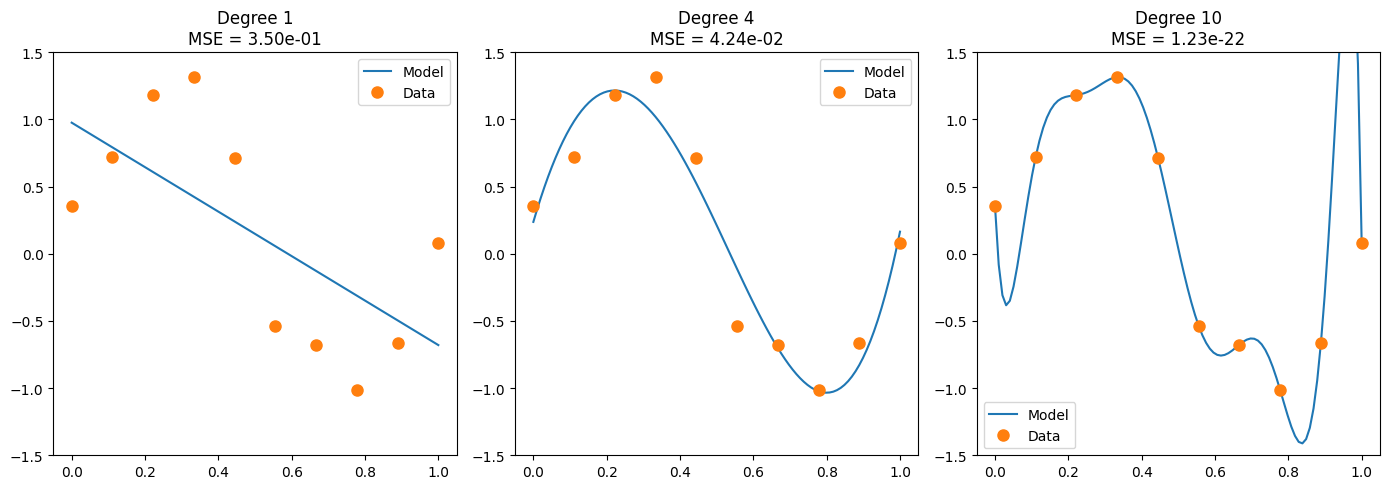

In [4]:
# OVERFITTING

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate some synthetic data
np.random.seed(0)
X = np.linspace(0, 1, 10)[:, np.newaxis]
y = np.sin(2 * np.pi * X).ravel() + np.random.normal(0, 0.2, X.shape[0])

# Fit models with different polynomial degrees
degrees = [1, 4, 10]
plt.figure(figsize=(14, 5))

for i, degree in enumerate(degrees):
    ax = plt.subplot(1, len(degrees), i + 1)
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X, y)

    # Evaluate the model
    X_test = np.linspace(0, 1, 100)[:, np.newaxis]
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y, pipeline.predict(X))

    # Plotting the results
    plt.plot(X_test, y_pred, label="Model")
    plt.plot(X, y, 'o', label="Data", markersize=8)
    plt.title("Degree {}\nMSE = {:.2e}".format(degree, mse))
    plt.ylim(-1.5, 1.5)
    plt.legend(loc="best")

plt.tight_layout()
plt.show()


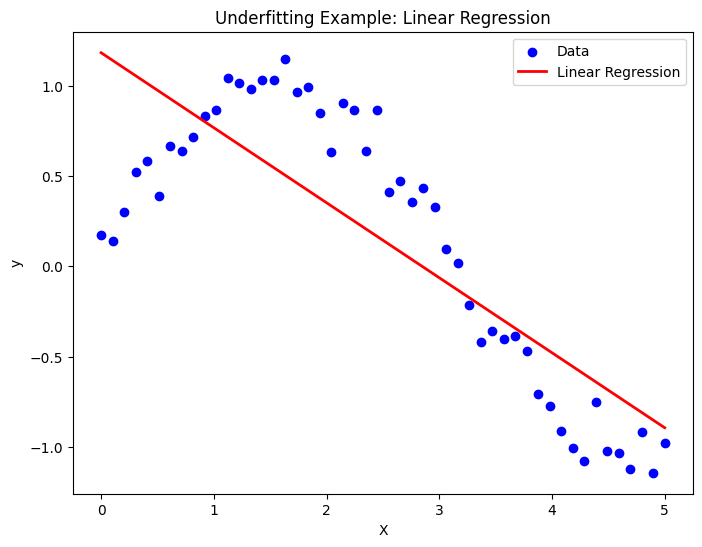

Mean Squared Error (MSE): 0.1833


In [5]:
## UNDERFITTING

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate some synthetic data
np.random.seed(0)
X = np.linspace(0, 5, 50)[:, np.newaxis]
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Regression')
plt.title('Underfitting Example: Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)
print(f'Mean Squared Error (MSE): {mse:.4f}')
